In [1]:
import json
import numpy as np
from collections import OrderedDict
from collections import defaultdict
from collections import Counter
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams['font.serif'] = ['Times New Roman']
rcParams["font.size"] = "8"
rcParams['text.usetex'] ='false'
rcParams["font.weight"] = "normal"
rcParams["axes.labelweight"] = "normal"
rcParams['figure.dpi'] = 200

# Helper functions (returns tuple of most common element and its count)
def calc_mode(l):
    a = Counter(l)
    return a.most_common(1)[0]

In [2]:
path = r'./Results'

class colors:
    RED = '\033[91m'
    GREEN = '\033[92m'
    BLUE = '\033[94m'
    ORANGE = '\033[93m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [3]:
records = [] # all survey submissions

# Open json files
files = [f for f in listdir(path) if isfile(join(path, f))]
for file in files:
    with open(join(path, file), 'r') as f:
        records.append(json.load(f)['form'])

In [4]:
d = OrderedDict() # better datastructure

# Go over one record and define better datastructure
for key,value in records[0].items():
    page, item = key.split('.')
    
    # Add page
    if page not in d:
        d[page] = OrderedDict()
        
    # Add item
    d[page][item] = []
    
# Fill better datastructure
for record in records:
    for key,value in record.items():
        page, item = key.split('.')
        if value != '': # too filter empty text answers (optional)
            d[page][item].append(value)
        
# Sort pages in better datastructure
keyorder = ['general',
            'expertise',
            'scrollingPage1',
            'scrollingPage2',
            'dynamicCarousel1',
            'dynamicCarousel2',
            'expandingMenu1',
            'expandingMenu2',
            'feedback',
            'submission']
d = OrderedDict(sorted(d.items(), key=lambda i:keyorder.index(i[0])))

In [5]:
# Perform filtering
del d['submission']

In [6]:
# For some items apply counter instead of plain printing
counters = ['gender',
            'number', # number of studies, should have been number-studies
            'analysis',
            'evaluates',
            'modality',
            'representation',
            'tool',
            'element',
            'full-automatic',
            'novelty',
            'semi-automatic']

# Pretty print dictionary
for page,items in d.items():
    print(colors.ORANGE + page + colors.ENDC)
    for name,value in items.items():
        
        # Decide how to print value
        str_value = str(value)
        print_counts = False
        tokens = name.split('_')
        if len(tokens) > 0 and tokens[0] in counters:
            if len(tokens) > 1:
                print_counts = not name.split('_')[1] == 'other'
            else:
                print_counts = True
        if print_counts:
            counts = OrderedDict(Counter(value))
            counts = OrderedDict(sorted(counts.items(), reverse=True))
            str_value = ''
            for a, b in counts.items():
                str_value += a + ': ' + str(b) + '; '
            
        # Print it to output
        print('  %-45s%s' % (colors.BLUE + name + colors.ENDC, colors.GREEN + str_value + colors.ENDC))

general
  age                                 ['45', '41', '26', '47', '34', '29', '25', '40']
  gender                              male: 3; female: 5; 
  job                                 ['Product Owner', 'Usability Expert', 'Sales Associate', 'Consultant', 'Head of eye-tracking laboratory', 'phd', 'Research Assistant', 'Researcher']
  number_studies                      4-10 studies: 3; 11+ studies: 4; 1-3 studies: 1; 
  years_profession                    ['5', '5', '1', '23', '8', '1', '2', '7']
expertise
  analysis_aoi_gaze                   yes: 8; 
  analysis_aoi_mouse                  yes: 3; no: 5; 
  analysis_attentionmap               yes: 1; no: 7; 
  analysis_heatmap_gaze               yes: 6; no: 2; 
  analysis_heatmap_mouse              yes: 1; no: 7; 
  analysis_markers                    no: 8; 
  analysis_mousetrace                 yes: 3; no: 5; 
  analysis_other                      []
  analysis_scanpath                   yes: 5; no: 3; 
  analysis_scrollmap   

In [7]:
# Age average
int_ages = [int(x) for x in d['general']['age']]
print('Age mean: ' + str(np.mean(int_ages)) + '; Age std: ' + str(np.std(int_ages)))

Age mean: 35.875; Age std: 8.037995707886388


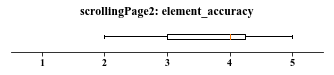

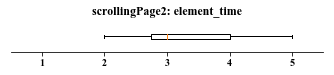

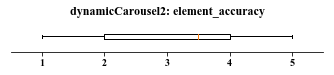

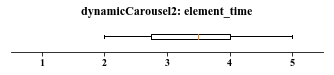

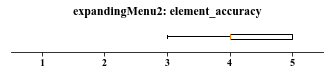

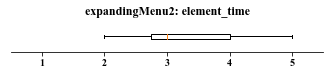

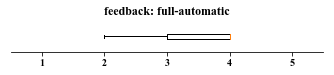

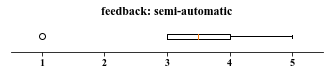

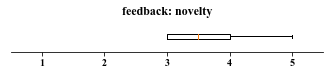

In [8]:
# Plot likert scales as boxplot
opinion_dict = {
    'Strongly Disagree': 1, 'Disagree': 2, 'Undecided': 3, 'Agree': 4, 'Strongly Agree': 5,
    'Definitely Not': 1, 'Probably Not': 2, 'Possibly': 3, 'Very Probably': 4, 'Definitely': 5,
    'Not at all': 1, 'Slightly': 2, 'Moderately': 3, 'Very': 4, 'Extremely': 5
}

# Styling
medianprops = dict(linestyle='-.', linewidth=2, color='black')
boxwidth = 0.5
colors = [
    '#0c3875', # scrollingPage2
    '#c82b25', # dynamicCarousel2
    '#fd9d06'] # expandingMenu2
colors.reverse()
pages = ['scrollingPage2', 'dynamicCarousel2', 'expandingMenu2']
pages.reverse()

# Below is a simple example how the liker scale answers can be plotted as boxplot
def plot_likert(page, item):
    data = [opinion_dict[x] for x in d[page][item]]
    fig, ax = plt.subplots()
    fig.set_size_inches(5, 1)
    fig.tight_layout()
    ax.set_title(page + ': ' + item)
    ax.set_xlim([0.5,5.5])
    # ax.set_ylim([ymin,ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.boxplot(data, vert=False)

# For all likert scales within survey
plot_likert('scrollingPage2', 'element_accuracy')
plot_likert('scrollingPage2', 'element_time')

plot_likert('dynamicCarousel2', 'element_accuracy')
plot_likert('dynamicCarousel2', 'element_time')

plot_likert('expandingMenu2', 'element_accuracy')
plot_likert('expandingMenu2', 'element_time')

plot_likert('feedback', 'full-automatic')
plot_likert('feedback', 'semi-automatic')
plot_likert('feedback', 'novelty')

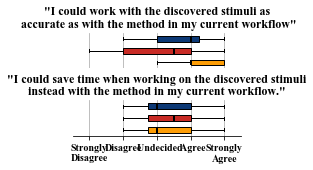

In [9]:
ticklabels = ['Strongly\nDisagree', 'Disagree', '  Undecided', '  Agree', 'Strongly\nAgree',]

# Collect data
data_accuracy = []
data_time = []
for page in pages:
    data_accuracy.append([opinion_dict[x] for x in d[page]['element_accuracy']])
for page in pages:
    data_time.append([opinion_dict[x] for x in d[page]['element_time']])
        
# Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 2))
fig.tight_layout()

# Accuracy axes
axes[0].set_xlim([0.5,5.5])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].get_xaxis().set_visible(True)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title('"I could work with the discovered stimuli as\n accurate as with the method in my current workflow"')
axes[0].grid(which='major', axis='both')
axes[0].set_axisbelow(True)
axes[0].set_xticklabels([])
axes[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Times axes
axes[1].set_xlim([0.5,5.5])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(True)
axes[1].spines['left'].set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[1].set_xticklabels([''] + ticklabels) # xticklabels expect x to start at zero, thus, add empty label for zero
# ax.set_ylim([ymin,ymax])
axes[1].set_title('"I could save time when working on the discovered stimuli\ninstead with the method in my current workflow."')
axes[1].grid(which='major', axis='both')
axes[1].set_axisbelow(True)

bplot_accuracy = axes[0].boxplot(data_accuracy, vert=False, patch_artist=True, medianprops=medianprops, widths=boxwidth)
for patch, color in zip(bplot_accuracy['boxes'], colors):
    patch.set_facecolor(color)
    
bplot_time = axes[1].boxplot(data_time, vert=False, patch_artist=True, medianprops=medianprops, widths=boxwidth)
for patch, color in zip(bplot_time['boxes'], colors):
    patch.set_facecolor(color)

# Plot it
plt.subplots_adjust(hspace=0.9)
plt.show()
fig.savefig('survey_accuracy_time.pdf', bbox_inches='tight')

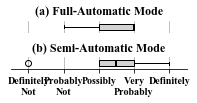

In [10]:
ticklabels = ['Definitely\nNot', 'Probably\nNot', 'Possibly', 'Very\nProbably', 'Definitely']

# Collect data
data_full_automatic = [opinion_dict[x] for x in d['feedback']['full-automatic']]
data_semi_automatic = [opinion_dict[x] for x in d['feedback']['semi-automatic']]
        
# Prepare plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 1.25))
fig.tight_layout()

# Accuracy axes
axes[0].set_xlim([0.5,5.5])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].get_xaxis().set_visible(True)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title('(a) Full-Automatic Mode')
axes[0].grid(which='major', axis='both')
axes[0].set_axisbelow(True)
axes[0].set_xticklabels([])
axes[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# Times axes
axes[1].set_xlim([0.5,5.5])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_visible(True)
axes[1].spines['left'].set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[1].set_xticklabels([''] + ticklabels) # xticklabels expect x to start at zero, thus, add empty label for zero
# ax.set_ylim([ymin,ymax])
axes[1].set_title('(b) Semi-Automatic Mode')
axes[1].grid(which='major', axis='both')
axes[1].set_axisbelow(True)

bplot_full_automatic = axes[0].boxplot(data_full_automatic, vert=False, patch_artist=True, medianprops=medianprops, widths=boxwidth)
bplot_full_automatic['boxes'][0].set_facecolor('lightgray')
    
bplot_semi_automatic = axes[1].boxplot(data_semi_automatic, vert=False, patch_artist=True, medianprops=medianprops, widths=boxwidth)
bplot_semi_automatic['boxes'][0].set_facecolor('lightgray')

# Plot it
plt.subplots_adjust(hspace=2.0)
plt.show()
fig.savefig('survey_feedback.pdf', bbox_inches='tight')

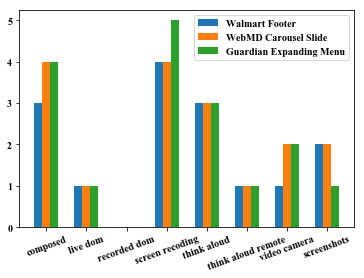

Modes:
composed: #4
live dom: #1
recorded dom: #0
screen recoding: #4
think aloud: #3
think aloud remote: #1
video camera: #2
screenshots: #2


In [11]:
# Plot representation per scenario
repr_per_page = {}
for page in ['scrollingPage1', 'dynamicCarousel1', 'expandingMenu1']:
    repr_per_page[page] = {}
    yes_per_repr = repr_per_page[page]
    for name, value in d[page].items():
        counts = Counter(value)
        yes_per_repr[name] = counts['yes']

# Following dict defines order and choice of items to include
labels = OrderedDict()
labels['representation_composed'] = 'composed'
labels['representation_live_dom'] = 'live dom'
labels['representation_recorded_dom'] = 'recorded dom'
labels['representation_screen_recording'] = 'screen recoding'
labels['representation_think_aloud'] = 'think aloud'
labels['representation_think_aloud_remote'] = 'think aloud remote'
labels['representation_video_camera'] = 'video camera'
labels['representation_screenshots'] = 'screenshots'

# Build for each page aka scenario a list
scrollingPageRepr = [repr_per_page['scrollingPage1'][key] for key,value in labels.items()]
dynamicCarouselRepr = [repr_per_page['dynamicCarousel1'][key] for key,value in labels.items()]
expandingMenuRepr = [repr_per_page['expandingMenu1'][key] for key,value in labels.items()]

# Plotting
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, scrollingPageRepr, width, label='Walmart Footer')
rects2 = ax.bar(x, dynamicCarouselRepr, width, label='WebMD Carousel Slide')
rects3 = ax.bar(x + width, expandingMenuRepr, width, label='Guardian Expanding Menu')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels([value for key,value in labels.items()], rotation=20)
plt.legend(loc='upper right')
plt.show()

# Print modes
print('Modes:')
i = 0
for key,item in labels.items():
    mode = calc_mode([scrollingPageRepr[i], dynamicCarouselRepr[i], expandingMenuRepr[i]])
    i = i+1
    print(item + ': #' + str(mode[0]))